<a href="https://colab.research.google.com/github/AbdulBasit7775/Customer-Segmentation/blob/main/Customer_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 Data Exploration!!

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# !pip install openpyxl

In [ ]:
df = pd.read_csv('/content/online_retail_Dataset.csv', encoding='latin-1')
# df = pd.read_excel('/content/online_retail_Dataset.xlsx')
df.head()  # To read the first 5 rows of dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info() # This line of code generate Null and non-null values with their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49912 entries, 0 to 49911
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      49912 non-null  object 
 1   StockCode    49912 non-null  object 
 2   Description  49770 non-null  object 
 3   Quantity     49912 non-null  int64  
 4   InvoiceDate  49912 non-null  object 
 5   Price        49912 non-null  float64
 6   Customer ID  32030 non-null  float64
 7   Country      49911 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ MB


In [ ]:
df.describe() # This line of code generate Statistical summary of data frame

,Quantity,Price,Customer ID
count,49912.000000,49912.000000,32030.000000
mean,8.294218,6.423659,15426.016422
std,55.576019,166.651451,1752.300279
min,-9360.000000,0.000000,12347.000000
25%,1.000000,1.250000,14057.000000
50%,2.000000,2.510000,15464.000000
75%,8.000000,4.250000,17041.000000
max,2880.000000,16888.020000,18283.000000


In [ ]:
df.describe(include = "O") # This line also include Statistical data about string columns in dataframe only

,Invoice,StockCode,Description,InvoiceDate,Country
count,49912,49912,49770,49912,49911
unique,2335,2877,2815,2060,24
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,12/6/2010 16:57,United Kingdom
freq,675,283,288,675,46933


In [ ]:
df[df['Customer ID'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [ ]:
df['Description'].head()

,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
df[df["Quantity"] < 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [ ]:
df["Invoice"] = df["Invoice"].astype(str)
df[df["Invoice"].str.match("^\\d{6}$") == False].head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
937,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom


In [ ]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C'], dtype=object)

In [ ]:
df["StockCode"] = df["StockCode"].astype('str')
df[df["StockCode"].str.match("^\\d{5}$") == False].head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,2.55,17850.0,United Kingdom
51,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 9:02,2.75,17850.0,United Kingdom
60,536373,82494L,WOODEN FRAME ANTIQUE WHITE,6,12/1/2010 9:02,2.55,17850.0,United Kingdom
61,536373,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 9:02,3.39,17850.0,United Kingdom
62,536373,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 9:02,3.39,17850.0,United Kingdom


In [ ]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [ ]:
df["StockCode"] = df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20'], dtype=object)

## 2. Data Cleaning !!

In [ ]:
# removing all the which contain cancel invoices
df = df.loc[df["Invoice"].str.match("^\\d{6}$") == True]

In [ ]:
df = df.loc[(df["StockCode"].str.match("^\\d{5}$") == True) | (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48792 entries, 0 to 49911
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      48792 non-null  object 
 1   StockCode    48792 non-null  object 
 2   Description  48650 non-null  object 
 3   Quantity     48792 non-null  int64  
 4   InvoiceDate  48792 non-null  object 
 5   Price        48792 non-null  float64
 6   Customer ID  31032 non-null  float64
 7   Country      48791 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.4+ MB


In [ ]:
df.dropna(subset=["Customer ID"], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31032 entries, 0 to 49910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice      31032 non-null  object 
 1   StockCode    31032 non-null  object 
 2   Description  31032 non-null  object 
 3   Quantity     31032 non-null  int64  
 4   InvoiceDate  31032 non-null  object 
 5   Price        31032 non-null  float64
 6   Customer ID  31032 non-null  float64
 7   Country      31032 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
len(df['Price'] < 0.0)

31032

In [ ]:
len(df[df['Price'] < 0.0])

0

In [ ]:
df['Total'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
aggregated_df = df.groupby(by="Customer ID", as_index=False).agg(
    TotalSpent=("Total", "sum"),
    NumberOfInvoices=("Invoice", "nunique"),
    LatestPurchaseDate=("InvoiceDate", "max")
)

aggregated_df.head(20)

,Customer ID,TotalSpent,NumberOfInvoices,LatestPurchaseDate
0,12347.0,711.79,1,12/7/2010 14:57
1,12348.0,652.80,1,12/16/2010 19:09
2,12370.0,1748.02,2,12/17/2010 9:38
3,12377.0,1001.52,1,12/20/2010 9:37
4,12383.0,555.72,1,12/22/2010 14:28
5,12386.0,401.90,2,12/8/2010 9:53
6,12395.0,589.92,2,12/3/2010 16:35
7,12413.0,425.25,1,1/6/2011 16:12
8,12415.0,7011.38,1,1/6/2011 11:12
9,12417.0,261.34,1,12/17/2010 11:51


In [ ]:

# Convert 'LatestPurchaseDate' to datetime objects
aggregated_df["LatestPurchaseDate"] = pd.to_datetime(aggregated_df["LatestPurchaseDate"])

# Calculate max_invoice_date after conversion
max_invoice_date = aggregated_df["LatestPurchaseDate"].max()

# Now calculate LastVisit
aggregated_df["LastVisit"] = (max_invoice_date - aggregated_df["LatestPurchaseDate"]).dt.days

aggregated_df.head(200)

,Customer ID,TotalSpent,NumberOfInvoices,LatestPurchaseDate,LastVisit
0,12347.0,711.79,1,2010-12-07 14:57:00,32
1,12348.0,652.80,1,2010-12-16 19:09:00,23
2,12370.0,1748.02,2,2010-12-17 09:38:00,23
3,12377.0,1001.52,1,2010-12-20 09:37:00,20
4,12383.0,555.72,1,2010-12-22 14:28:00,18
...,...,...,...,...,...
195,13599.0,721.98,3,2010-12-08 10:13:00,32
196,13611.0,303.15,1,2010-12-15 10:31:00,25
197,13627.0,311.19,1,2010-12-17 09:52:00,23
198,13629.0,660.00,1,2011-01-05 12:09:00,4


<Figure size 1500x500 with 0 Axes>

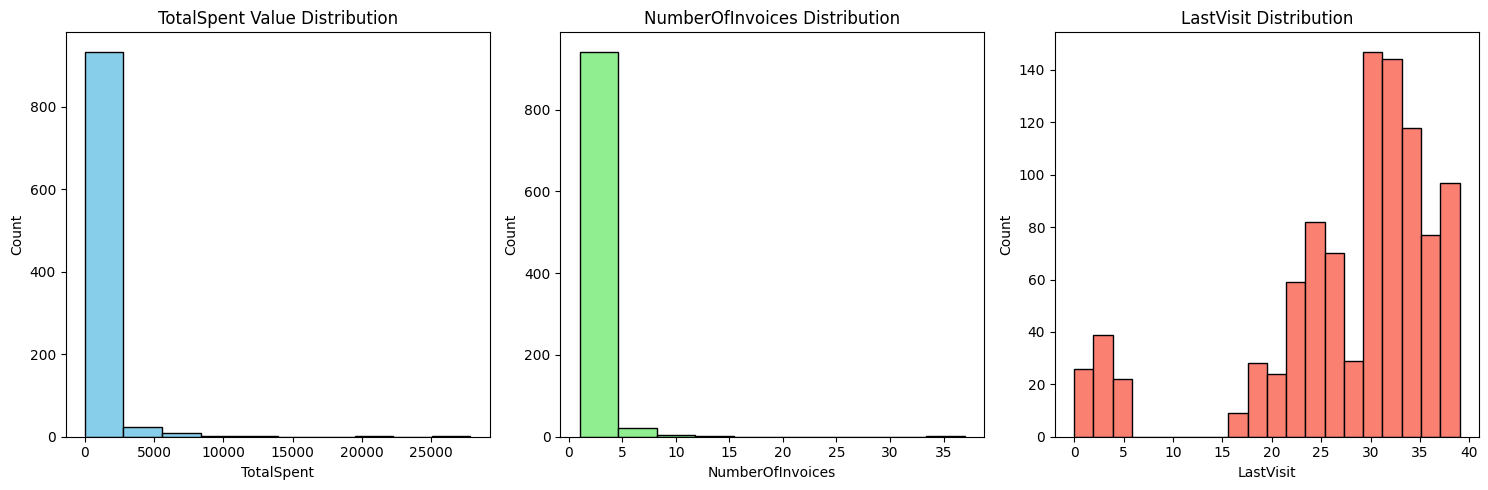

In [ ]:
plt.figure(figsize=(15, 5))

# plt.subplot(1, 3, 1)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['TotalSpent'], bins=10, color='skyblue', edgecolor='black')
plt.title('TotalSpent Value Distribution')
plt.xlabel('TotalSpent')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['NumberOfInvoices'], bins=10, color='lightgreen', edgecolor='black')
plt.title('NumberOfInvoices Distribution')
plt.xlabel('NumberOfInvoices')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['LastVisit'], bins=20, color='salmon', edgecolor='black')
plt.title('LastVisit Distribution')
plt.xlabel('LastVisit')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

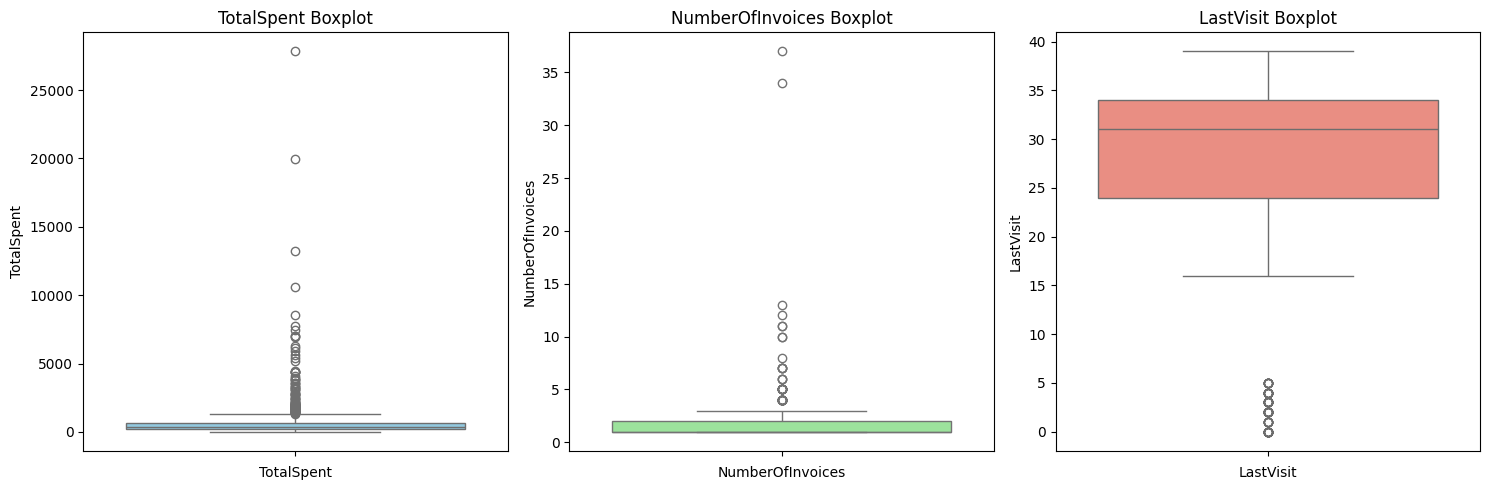

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['TotalSpent'], color='skyblue')
plt.title('TotalSpent Boxplot')
plt.xlabel('TotalSpent')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['NumberOfInvoices'], color='lightgreen')
plt.title('NumberOfInvoices Boxplot')
plt.xlabel('NumberOfInvoices')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['LastVisit'], color='salmon')
plt.title('LastVisit Boxplot')
plt.xlabel('LastVisit')

plt.tight_layout()
plt.show()

In [ ]:
M_Q1 = aggregated_df["TotalSpent"].quantile(0.25)
M_Q3 = aggregated_df["TotalSpent"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["TotalSpent"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["TotalSpent"] < (M_Q1 - 1.5 * M_IQR))].copy()

F_Q1 = aggregated_df['NumberOfInvoices'].quantile(0.25)
F_Q3 = aggregated_df['NumberOfInvoices'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['NumberOfInvoices'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['NumberOfInvoices'] < (F_Q1 - 1.5 * F_IQR))].copy()

non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()


,Customer ID,TotalSpent,NumberOfInvoices,LatestPurchaseDate,LastVisit
count,858.000000,858.000000,858.000000,858,858.000000
mean,15491.876457,382.560559,1.311189,2010-12-12 10:48:10.349650432,27.798368
min,12347.000000,12.450000,1.000000,2010-12-01 08:35:00,0.000000
25%,14081.250000,186.825000,1.000000,2010-12-06 10:21:00,24.000000
50%,15591.500000,310.200000,1.000000,2010-12-09 12:08:30,31.000000
75%,16984.500000,476.447500,1.750000,2010-12-16 09:29:00,34.000000
max,18283.000000,1313.500000,3.000000,2011-01-09 14:28:00,39.000000
std,1712.851181,272.284863,0.579615,NaN,9.855201


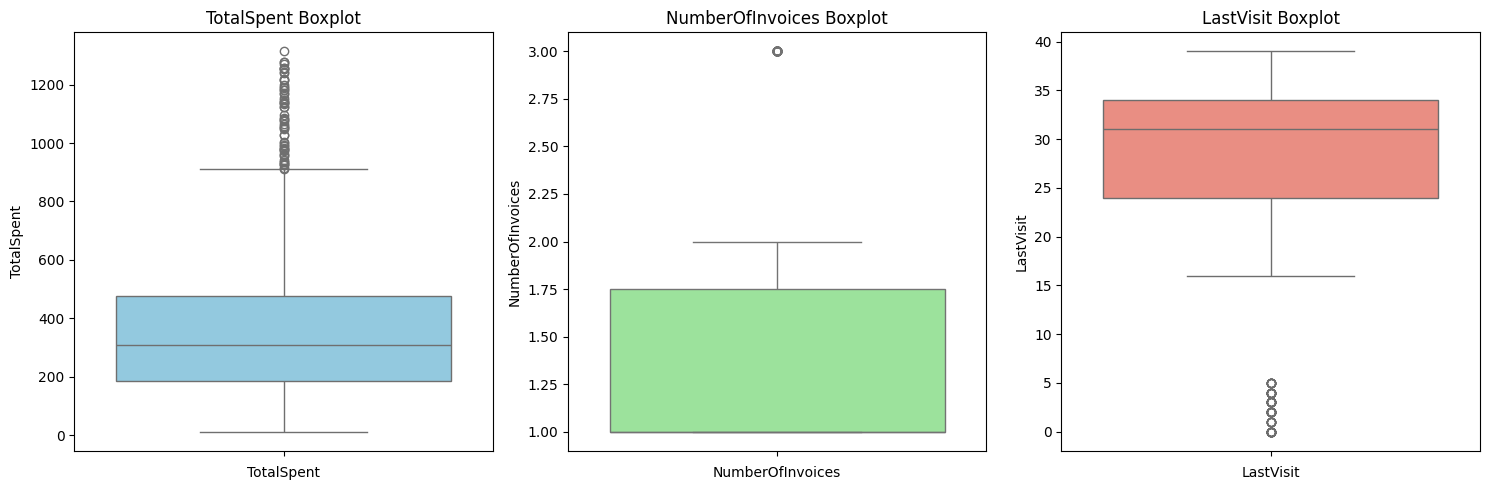

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['TotalSpent'], color='skyblue')
plt.title('TotalSpent Boxplot')
plt.xlabel('TotalSpent')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['NumberOfInvoices'], color='lightgreen')
plt.title('NumberOfInvoices Boxplot')
plt.xlabel('NumberOfInvoices')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['LastVisit'], color='salmon')
plt.title('LastVisit Boxplot')
plt.xlabel('LastVisit')

plt.tight_layout()
plt.show()

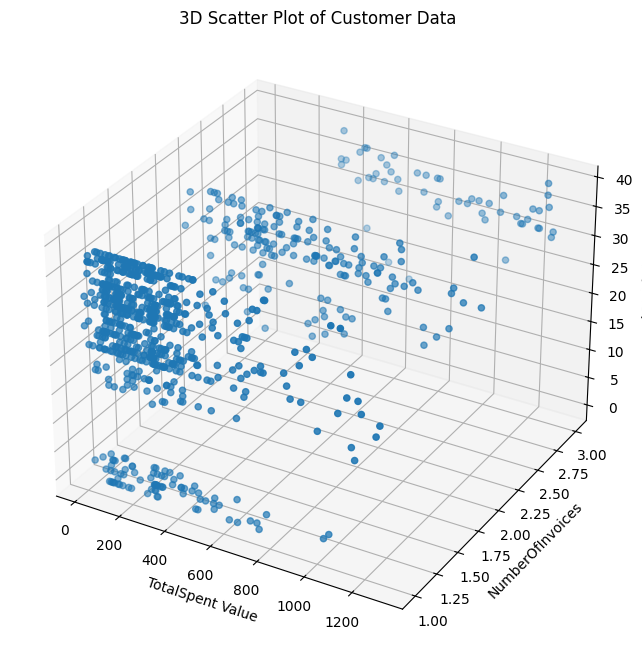

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["TotalSpent"], non_outliers_df["NumberOfInvoices"], non_outliers_df["LastVisit"])

ax.set_xlabel('TotalSpent Value')
ax.set_ylabel('NumberOfInvoices')
ax.set_zlabel('LastVisit')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [ ]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["TotalSpent", "NumberOfInvoices", "LastVisit"]])

scaled_data

array([[ 1.20984128, -0.53720159,  0.42658513],
       [ 0.99306681, -0.53720159, -0.48717087],
       [ 2.27453134, -0.53720159, -0.79175621],
       ...,
       [-0.55805208, -0.53720159, -0.48717087],
       [-0.78625507, -0.53720159,  0.42658513],
       [-1.00729227, -0.53720159, -2.51773978]])

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers_df.index, columns=["TotalSpent", "NumberOfInvoices", "LastVisit"])

scaled_data_df

,TotalSpent,NumberOfInvoices,LastVisit
0,1.209841,-0.537202,0.426585
1,0.993067,-0.537202,-0.487171
3,2.274531,-0.537202,-0.791756
4,0.636320,-0.537202,-0.994813
5,0.071068,1.189087,0.426585
...,...,...,...
966,-0.061848,-0.537202,-0.791756
967,-0.023006,-0.537202,0.426585
968,-0.558052,-0.537202,-0.487171
969,-0.786255,-0.537202,0.426585


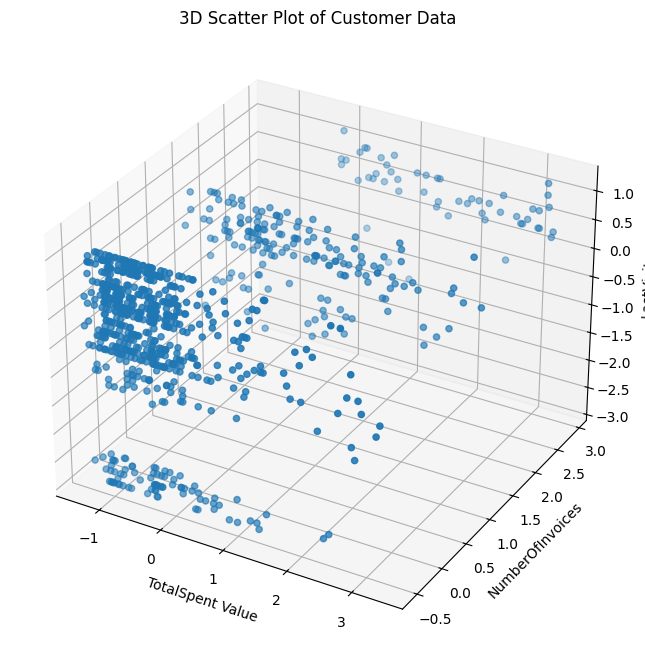

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["TotalSpent"], scaled_data_df["NumberOfInvoices"], scaled_data_df["LastVisit"])

ax.set_xlabel('TotalSpent Value')
ax.set_ylabel('NumberOfInvoices')
ax.set_zlabel('LastVisit')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

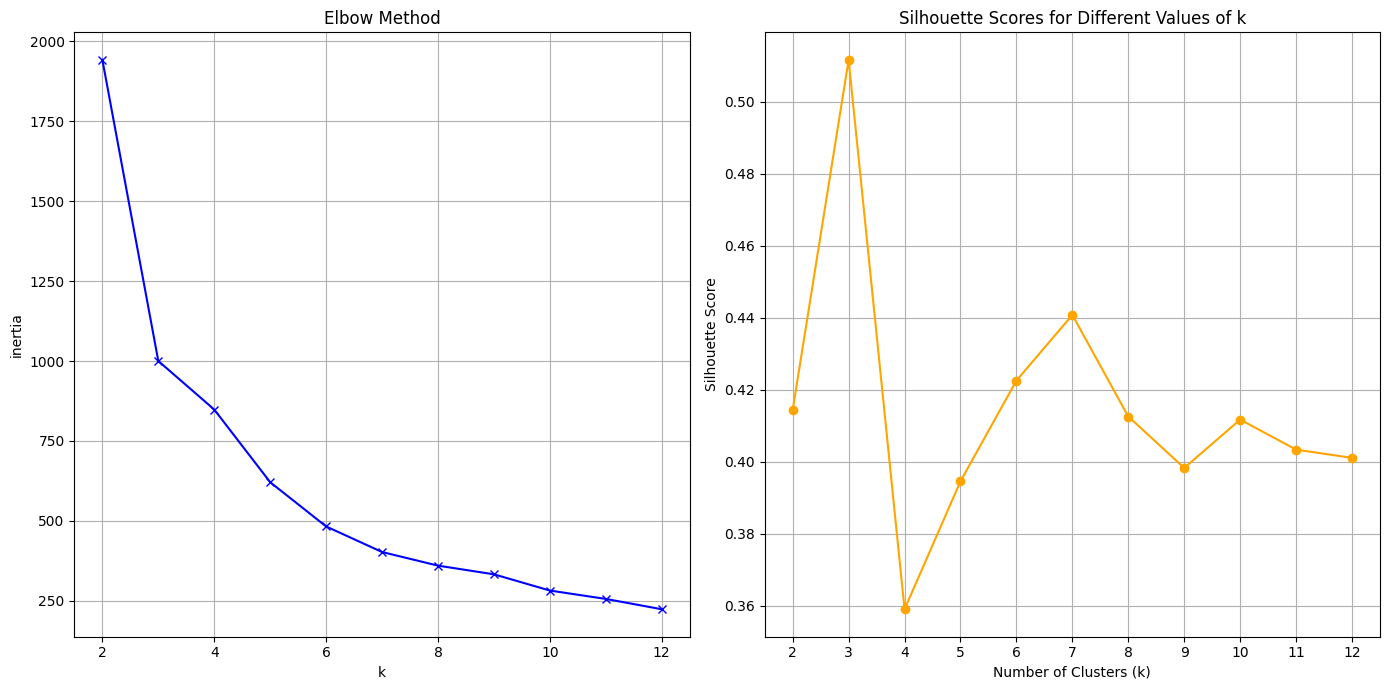

In [ ]:
max_k = 12

inertia_value = []
silhoutte_scores = []  # Initialize silhoutte_scores
k_values = range(2, max_k + 1) # Start k_values from 2 instead of 1

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit(scaled_data_df)
    inertia_value.append(kmeans.inertia_)
    # Calculate silhouette score for each k and append to the list
    silhoutte_scores.append(silhouette_score(scaled_data_df, kmeans.labels_))


# Move the plotting outside the loop
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_value, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.grid(True)
plt.title('Elbow Method')


plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')  # Use the calculated silhoutte_scores
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([3, 2, 0, 2, 0, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 1, 1, 3, 2, 1,
       2, 2, 3, 2, 0, 3, 0, 1, 3, 2, 2, 0, 3, 2, 2, 3, 0, 0, 0, 2, 3, 2,
       0, 2, 1, 3, 0, 3, 0, 3, 2, 3, 3, 0, 3, 3, 3, 2, 3, 0, 0, 3, 2, 3,
       3, 2, 2, 3, 3, 0, 2, 2, 3, 2, 0, 1, 3, 2, 3, 3, 2, 3, 2, 2, 3, 2,
       3, 0, 3, 3, 0, 1, 0, 2, 0, 0, 0, 2, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3,
       1, 2, 3, 2, 1, 1, 2, 0, 2, 2, 2, 3, 1, 2, 3, 1, 3, 0, 0, 3, 1, 2,
       2, 3, 1, 2, 2, 0, 3, 1, 3, 3, 1, 3, 0, 0, 3, 2, 3, 0, 2, 3, 3, 3,
       3, 3, 0, 0, 1, 3, 0, 3, 1, 0, 2, 2, 1, 3, 3, 1, 0, 3, 3, 3, 1, 0,
       0, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 0, 2, 2, 3, 2, 2, 0, 2, 2, 2,
       0, 3, 3, 3, 3, 2, 3, 2, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 0, 2,
       3, 2, 3, 0, 2, 3, 2, 3, 3, 0, 2, 0, 3, 3, 2, 1, 3, 3, 0, 3, 3, 2,
       3, 0, 3, 2, 1, 2, 0, 3, 2, 3, 3, 3, 3, 2, 3, 0, 2, 2, 0, 3, 3, 3,
       3, 3, 3, 1, 3, 0, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 0, 1, 2, 0, 3,
       3, 2, 3, 3, 2, 1, 2, 2, 2, 2, 1, 1, 3, 2, 3,

In [ ]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

<ipython-input-36-c531f568f2b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,TotalSpent,NumberOfInvoices,LatestPurchaseDate,LastVisit,Cluster
0,12347.0,711.79,1,2010-12-07 14:57:00,32,3
1,12348.0,652.80,1,2010-12-16 19:09:00,23,2
3,12377.0,1001.52,1,2010-12-20 09:37:00,20,0
4,12383.0,555.72,1,2010-12-22 14:28:00,18,2
5,12386.0,401.90,2,2010-12-08 09:53:00,32,0
...,...,...,...,...,...,...
966,18245.0,365.73,1,2010-12-19 14:58:00,20,2
967,18259.0,376.30,1,2010-12-08 13:38:00,32,3
968,18260.0,230.70,1,2010-12-16 18:23:00,23,2
969,18269.0,168.60,1,2010-12-08 13:53:00,32,3


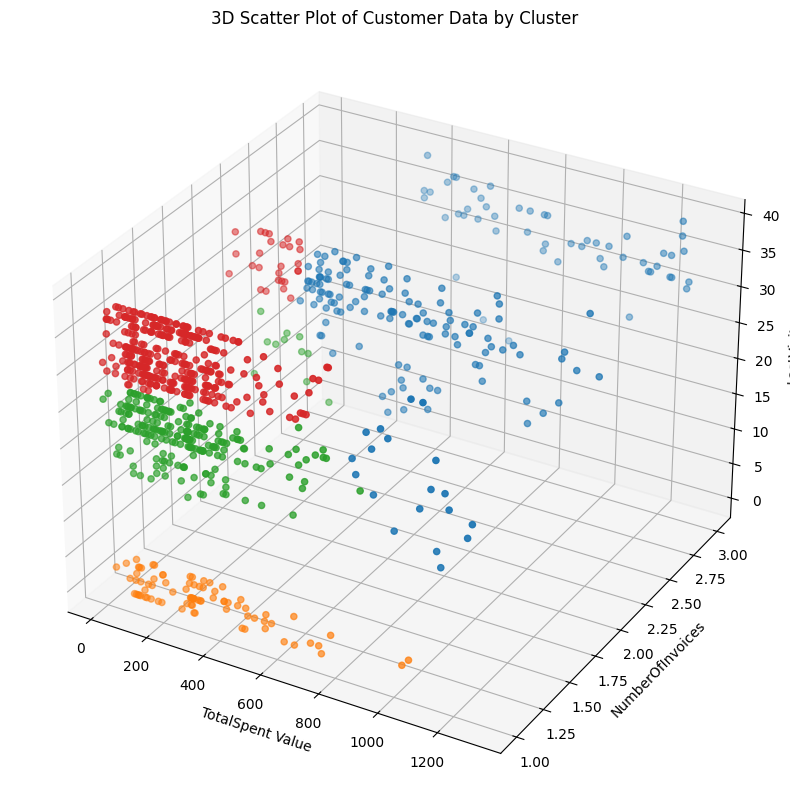

In [ ]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['TotalSpent'],
                     non_outliers_df['NumberOfInvoices'],
                     non_outliers_df['LastVisit'],
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('TotalSpent Value')
ax.set_ylabel('NumberOfInvoices')
ax.set_zlabel('LastVisit')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

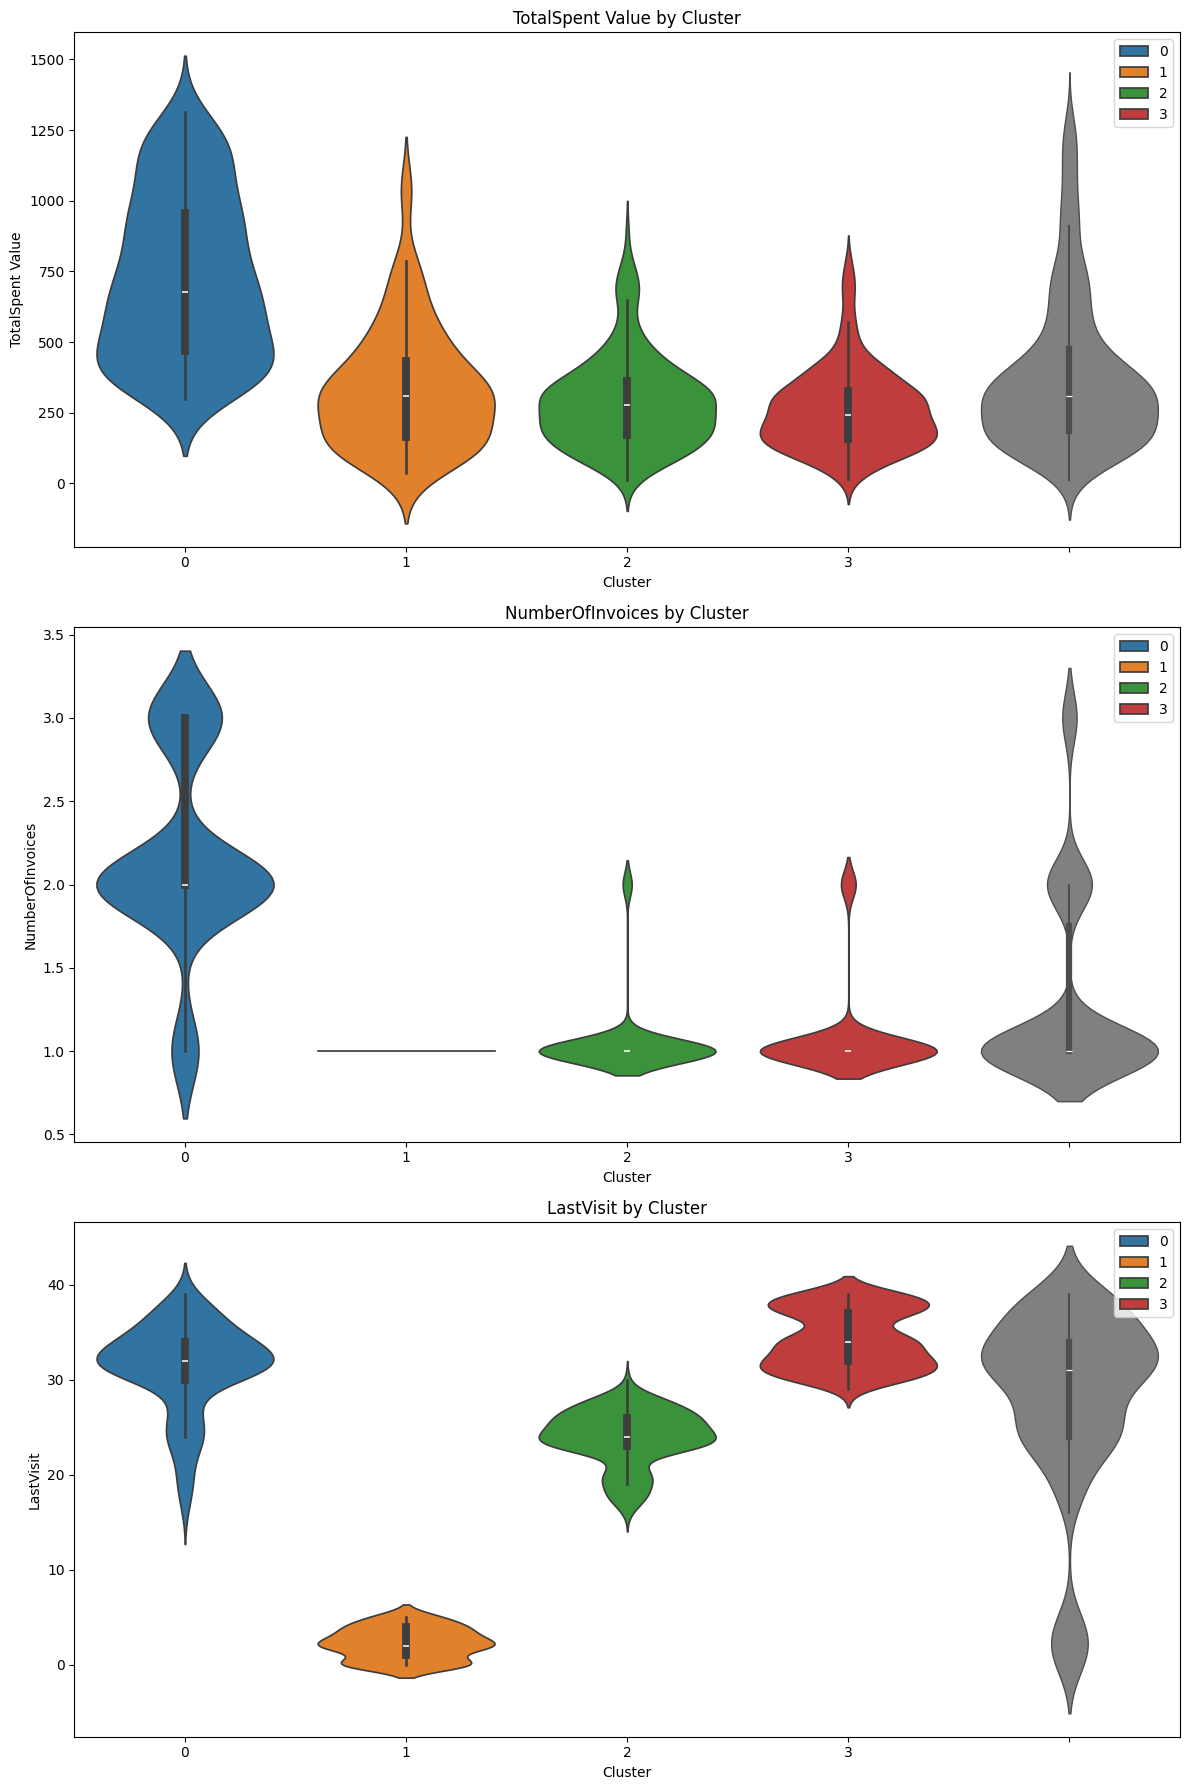

In [ ]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['TotalSpent'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['TotalSpent'], color='gray', linewidth=1.0)
plt.title('TotalSpent Value by Cluster')
plt.ylabel('TotalSpent Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['NumberOfInvoices'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['NumberOfInvoices'], color='gray', linewidth=1.0)
plt.title('NumberOfInvoices by Cluster')
plt.ylabel('NumberOfInvoices')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['LastVisit'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['LastVisit'], color='gray', linewidth=1.0)
plt.title('LastVisit by Cluster')
plt.ylabel('LastVisit')

plt.tight_layout()
plt.show()

**Cluster 0 (Blue):** "Retain"
Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

**Cluster 1 (Orange):** "Re-Engage"
Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

**Cluster 2 (Green):** "Nurture"
Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

**Cluster 3 (Red): **"Reward"
Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.


**Visualization**


<ipython-input-43-def88ea4b487>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["TotalSpent per 100 pounds"] = non_outliers_df["TotalSpent"] / 100.00


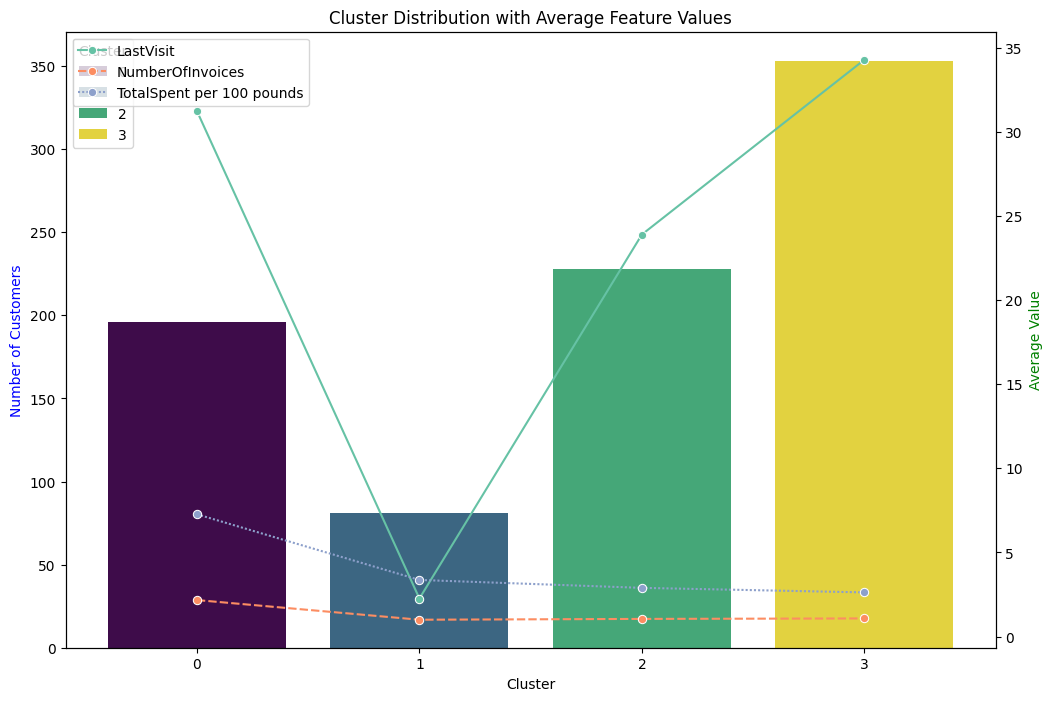

In [ ]:

cluster_counts = non_outliers_df['Cluster'].value_counts() # Replace 'ClusterLabel' with 'Cluster'
non_outliers_df["TotalSpent per 100 pounds"] = non_outliers_df["TotalSpent"] / 100.00
feature_means = non_outliers_df.groupby('Cluster')[['LastVisit', 'NumberOfInvoices', 'TotalSpent per 100 pounds']].mean() # Replace 'ClusterLabel' with 'Cluster'

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()